- このコードはhttps://github.com/takyamamotoを参考にして書きました

In [11]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from Models import STDP_module
import chainer
import os
from tqdm import tqdm

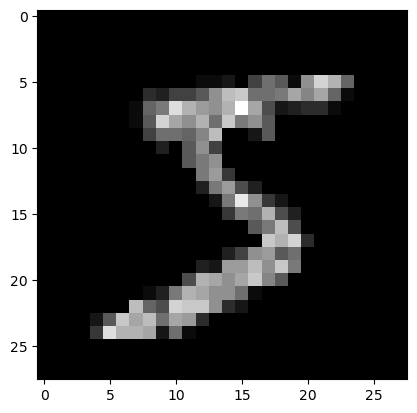

In [12]:
dt=1e-3
t_inj=0.350
nt_inj=round(t_inj/dt)

train,_=chainer.datasets.get_mnist()
input_spikes=STDP_module.online_load_and_encoding_dataset(dataset=train,i=0,
                                        dt=dt,n_time=nt_inj)

plt.imshow(np.reshape(np.sum(input_spikes,axis=0),(28,28)),cmap='gray')
plt.show()

In [13]:
dt=1e-3
t_inj=0.350
t_blank=0.15
nt_inj=round(t_inj/dt)
nt_blank=round(t_blank/dt)

n_neurons=100
n_labels=10
n_epoch=30

n_train=10000
update_nt=nt_inj

train,_=chainer.datasets.get_mnist()
labels=np.array([train[i][1] for i in range(n_train)])

network=STDP_module.Network(n_in=784,n_neurons=n_neurons,
                            wexc=2.25,winh=0.85,
                            dt=dt,wmin=0.0,wmax=2e-5,
                            lr=(1e-2,1e-4),
                            update_nt=update_nt)

network.initialize_states()

spikes=np.zeros((n_train,n_neurons)).astype(np.uint8)
accuracy_all=np.zeros(n_epoch)
blank_input=np.zeros(784)
init_max_fr=32

In [14]:
result_save_dir='./LIF_WTA_STDP_MNIST_results/'
os.makedirs(result_save_dir,exist_ok=True)

100%|██████████| 10000/10000 [38:58<00:00,  4.28it/s]


Assignments:
 [0 0 7 6 0 0 5 6 0 1 1 7 9 3 6 1 2 3 0 1 3 1 6 1 7 1 3 3 6 0 1 9 3 2 5 3 1
 1 0 3 3 7 1 1 2 7 6 1 4 1 4 3 7 1 7 7 5 5 9 3 4 1 1 0 0 0 4 3 6 6 1 4 6 0
 3 0 1 0 7 7 2 4 1 1 2 0 1 1 4 4 9 8 4 9 6 2 1 7 7 6]
Ave. spikes: 17.84
Min. spikes: 5
Max. spikes: 255
epoch : 0  accuracy : 0.4558


100%|██████████| 10000/10000 [42:45<00:00,  3.90it/s]


Assignments:
 [0 8 7 6 0 0 5 6 0 7 1 2 9 3 6 1 2 3 0 1 3 1 6 2 6 3 0 2 6 0 1 9 5 7 8 3 3
 3 0 3 0 7 3 3 2 4 2 3 4 7 3 3 5 3 7 9 5 3 9 6 4 0 3 0 0 0 4 5 8 0 0 4 6 7
 4 0 2 2 9 7 2 4 1 1 2 0 6 5 4 9 6 8 5 9 6 4 3 2 6 6]
Ave. spikes: 13.95
Min. spikes: 5
Max. spikes: 64
epoch : 1  accuracy : 0.5215


100%|██████████| 10000/10000 [43:29<00:00,  3.83it/s]


Assignments:
 [0 8 9 6 7 0 7 6 0 7 1 2 7 0 6 1 2 2 7 1 3 1 6 2 8 3 0 7 6 0 1 9 8 4 8 6 3
 3 0 7 0 7 3 3 2 7 5 3 6 7 5 3 5 3 9 9 5 0 9 6 3 0 3 0 0 0 6 3 8 0 0 5 6 4
 5 0 2 2 9 7 2 4 1 1 6 0 6 7 9 9 6 2 5 9 0 4 3 2 6 3]
Ave. spikes: 14.07
Min. spikes: 5
Max. spikes: 58
epoch : 2  accuracy : 0.562


100%|██████████| 10000/10000 [43:33<00:00,  3.83it/s]


Assignments:
 [0 8 9 6 7 0 5 6 0 3 1 2 9 0 6 1 7 2 7 1 3 1 6 1 8 3 0 7 6 0 1 5 8 4 8 6 3
 3 0 7 3 4 3 3 2 0 5 3 6 7 8 3 2 3 9 4 5 0 9 6 3 0 3 4 0 0 6 3 8 0 0 5 7 4
 5 0 1 2 9 6 6 4 1 1 6 0 6 5 9 9 6 2 5 9 0 4 3 2 6 3]
Ave. spikes: 14.12
Min. spikes: 5
Max. spikes: 60
epoch : 3  accuracy : 0.5557


100%|██████████| 10000/10000 [42:26<00:00,  3.93it/s]


Assignments:
 [0 8 9 3 7 0 5 3 2 3 1 2 9 0 4 1 7 2 4 1 3 1 6 2 2 3 0 7 7 0 1 5 3 4 8 6 0
 3 7 7 3 4 3 0 2 0 5 3 2 7 8 3 2 3 9 4 5 0 9 6 3 0 0 7 0 0 6 8 8 0 0 5 7 4
 5 0 2 2 9 6 6 4 1 1 6 0 6 5 9 4 6 2 5 8 0 4 3 2 6 3]
Ave. spikes: 13.94
Min. spikes: 5
Max. spikes: 50
epoch : 4  accuracy : 0.579


100%|██████████| 10000/10000 [40:17<00:00,  4.14it/s]


Assignments:
 [0 2 4 3 8 0 5 3 2 9 1 2 9 0 4 1 7 2 9 1 3 1 6 2 2 3 0 7 7 0 1 5 3 4 3 6 0
 3 7 6 3 4 3 0 1 0 5 3 2 7 8 3 1 3 9 4 3 0 9 6 3 0 0 7 0 0 6 8 3 5 0 5 7 4
 5 0 2 2 4 6 6 4 1 1 6 0 6 5 7 4 6 2 5 8 0 4 3 2 6 3]
Ave. spikes: 14.016
Min. spikes: 5
Max. spikes: 47
epoch : 5  accuracy : 0.6206


100%|██████████| 10000/10000 [44:24<00:00,  3.75it/s]


Assignments:
 [0 2 4 3 8 0 5 3 2 9 0 2 9 0 4 0 5 2 7 1 3 1 6 2 2 3 0 7 7 0 1 5 3 4 3 6 0
 3 7 6 3 4 3 0 1 0 5 3 2 7 8 3 1 3 9 4 3 0 9 6 5 0 0 7 0 0 6 8 3 5 0 5 4 4
 5 0 2 2 4 6 6 4 1 1 6 0 6 5 7 4 6 2 5 8 0 4 3 2 6 3]
Ave. spikes: 14.0
Min. spikes: 5
Max. spikes: 45
epoch : 6  accuracy : 0.6387


100%|██████████| 10000/10000 [44:49<00:00,  3.72it/s]


Assignments:
 [0 2 4 8 8 0 3 8 2 9 0 2 9 0 9 0 5 2 7 1 3 1 6 2 2 3 0 8 7 0 1 5 3 4 3 6 0
 3 7 6 3 4 3 0 1 0 5 3 2 8 8 3 1 3 9 4 3 0 9 6 3 0 0 7 0 0 6 8 3 5 0 5 4 4
 5 0 2 2 4 6 6 4 1 1 6 0 6 3 7 4 6 2 5 5 0 4 3 2 6 3]
Ave. spikes: 13.93
Min. spikes: 5
Max. spikes: 45
epoch : 7  accuracy : 0.667


100%|██████████| 10000/10000 [44:51<00:00,  3.72it/s]


Assignments:
 [0 2 4 8 8 5 3 8 2 9 0 2 9 0 9 0 5 2 9 1 3 1 6 2 2 3 0 8 7 0 1 5 3 4 3 6 0
 3 7 6 3 4 3 0 1 0 5 3 2 8 8 3 1 3 9 4 3 0 9 6 3 0 0 7 5 0 6 8 3 5 0 5 4 4
 5 0 2 2 4 6 6 4 1 1 6 0 6 3 7 4 3 2 5 5 0 4 5 2 6 3]
Ave. spikes: 13.94
Min. spikes: 5
Max. spikes: 45
epoch : 8  accuracy : 0.6816


100%|██████████| 10000/10000 [44:24<00:00,  3.75it/s]


Assignments:
 [0 2 4 8 8 5 3 8 2 9 0 2 9 0 9 0 5 2 9 1 3 1 6 2 2 3 0 8 7 0 1 5 3 4 3 6 0
 3 7 6 3 4 3 0 1 0 5 3 2 8 8 3 1 3 9 4 3 0 9 6 3 0 0 7 5 0 6 8 3 5 0 5 4 4
 5 0 2 2 4 6 6 4 1 1 6 0 6 3 7 4 3 2 5 5 0 4 5 2 6 3]
Ave. spikes: 13.98
Min. spikes: 5
Max. spikes: 50
epoch : 9  accuracy : 0.6787


100%|██████████| 10000/10000 [43:02<00:00,  3.87it/s]


Assignments:
 [0 2 4 8 8 5 3 8 2 9 0 2 9 0 7 0 5 2 9 1 3 1 6 2 2 3 0 8 7 0 1 5 3 4 3 6 0
 3 7 6 5 4 3 0 1 0 5 3 2 8 8 3 1 3 9 4 3 0 9 6 3 0 0 7 5 0 6 8 3 5 0 5 4 4
 5 0 2 2 4 6 6 4 1 1 6 0 6 3 7 4 3 2 5 5 0 9 5 2 6 3]
Ave. spikes: 13.984
Min. spikes: 5
Max. spikes: 52
epoch : 10  accuracy : 0.673


100%|██████████| 10000/10000 [44:50<00:00,  3.72it/s]


Assignments:
 [0 2 4 8 8 5 3 8 2 9 0 2 9 0 7 0 3 2 9 1 3 1 6 2 2 3 0 8 7 0 1 5 3 4 3 6 0
 3 7 6 5 4 3 0 1 0 5 3 2 8 8 2 1 3 9 4 3 0 9 6 3 0 0 7 5 0 6 8 3 5 0 5 4 4
 5 0 2 2 4 6 6 4 1 1 6 0 6 3 7 4 3 2 5 5 0 9 5 2 6 3]
Ave. spikes: 14.055
Min. spikes: 5
Max. spikes: 46
epoch : 11  accuracy : 0.6772


100%|██████████| 10000/10000 [44:00<00:00,  3.79it/s]


Assignments:
 [0 2 4 8 8 5 3 8 2 9 0 2 9 0 7 0 3 2 9 1 3 1 6 2 2 3 0 8 7 0 1 5 3 4 3 6 0
 3 7 6 5 4 3 0 1 0 5 3 2 8 8 2 1 3 9 4 3 0 9 6 3 0 0 7 5 0 6 8 3 5 0 5 4 4
 5 0 2 2 4 6 6 4 1 1 6 0 6 3 7 4 3 2 5 5 0 9 5 2 6 3]
Ave. spikes: 14.05
Min. spikes: 5
Max. spikes: 47
epoch : 12  accuracy : 0.681


100%|██████████| 10000/10000 [44:14<00:00,  3.77it/s]


Assignments:
 [0 2 4 8 8 5 3 8 2 9 0 2 9 0 7 0 3 2 9 1 3 1 6 2 2 3 0 8 7 0 1 5 3 4 3 6 0
 3 7 6 5 4 3 0 1 0 5 3 2 8 8 2 1 3 9 4 3 0 9 6 3 0 0 7 5 0 6 8 3 5 0 5 4 4
 5 0 2 2 4 6 6 4 1 1 6 0 6 3 7 4 3 2 5 5 0 9 5 2 6 3]
Ave. spikes: 13.99
Min. spikes: 5
Max. spikes: 42
epoch : 13  accuracy : 0.6797


100%|██████████| 10000/10000 [43:44<00:00,  3.81it/s]


Assignments:
 [0 2 4 8 8 5 3 8 2 9 0 2 9 0 7 0 3 2 9 1 3 1 6 2 2 3 0 8 7 0 1 5 3 4 3 6 0
 3 7 6 5 4 3 0 1 0 5 3 2 8 8 2 1 3 9 4 3 0 9 6 3 0 0 7 5 0 6 8 3 5 0 5 4 4
 5 0 2 2 4 6 6 4 1 1 6 0 6 3 7 4 3 2 5 5 0 9 5 2 6 3]
Ave. spikes: 14.03
Min. spikes: 5
Max. spikes: 52
epoch : 14  accuracy : 0.6846


100%|██████████| 10000/10000 [40:59<00:00,  4.07it/s]


Assignments:
 [0 2 4 8 8 5 3 8 2 9 0 2 9 0 7 0 3 2 9 1 3 1 6 2 2 3 0 8 7 0 1 5 3 4 3 6 0
 3 7 6 5 4 3 0 1 0 5 3 2 8 8 2 1 3 9 4 3 0 9 6 3 0 0 7 5 0 6 8 3 5 0 5 4 4
 5 0 2 2 4 6 6 4 1 1 6 0 6 3 7 4 3 2 5 5 0 9 5 2 6 3]
Ave. spikes: 14.04
Min. spikes: 5
Max. spikes: 46
epoch : 15  accuracy : 0.683


100%|██████████| 10000/10000 [41:31<00:00,  4.01it/s]


Assignments:
 [0 2 4 8 8 5 3 8 2 9 0 2 9 0 7 0 3 2 9 1 3 1 6 2 2 3 0 8 7 0 1 5 3 4 3 6 0
 3 7 6 5 4 3 0 1 0 5 3 2 8 8 2 1 3 9 4 3 0 9 6 3 0 0 7 5 0 6 8 3 5 0 5 4 4
 5 0 2 2 4 6 6 4 1 1 6 0 6 3 7 4 3 2 5 5 0 9 5 2 6 3]
Ave. spikes: 14.04
Min. spikes: 5
Max. spikes: 45
epoch : 16  accuracy : 0.6826


100%|██████████| 10000/10000 [44:42<00:00,  3.73it/s]


Assignments:
 [0 2 4 8 8 5 3 8 2 9 0 2 9 0 7 0 3 2 9 1 3 1 6 2 2 3 0 8 7 0 1 5 3 4 3 6 0
 3 7 6 5 4 3 0 1 0 5 3 2 8 8 2 1 3 9 4 3 0 9 6 3 0 0 7 5 0 6 8 3 5 0 5 4 4
 5 0 2 2 4 6 6 4 1 1 6 0 6 3 7 4 3 2 5 5 0 9 5 2 6 3]
Ave. spikes: 14.0
Min. spikes: 5
Max. spikes: 54
epoch : 17  accuracy : 0.6797


100%|██████████| 10000/10000 [42:58<00:00,  3.88it/s]


Assignments:
 [0 2 4 8 8 5 3 8 2 9 0 2 9 0 7 0 3 2 9 1 3 1 6 2 2 3 0 8 7 0 1 5 3 4 3 6 0
 3 7 6 5 4 3 0 1 0 5 3 2 8 8 2 1 3 9 4 3 0 9 6 3 0 0 7 5 0 6 8 3 5 0 5 4 4
 5 0 2 2 4 6 6 4 1 1 6 0 6 3 7 4 3 2 5 5 0 9 5 2 6 3]
Ave. spikes: 14.016
Min. spikes: 5
Max. spikes: 48
epoch : 18  accuracy : 0.6826


100%|██████████| 10000/10000 [44:54<00:00,  3.71it/s] 


Assignments:
 [0 2 4 8 8 5 3 8 2 9 0 2 9 0 7 0 3 2 9 1 3 1 6 2 2 3 0 8 7 0 1 5 3 4 3 6 0
 3 7 6 5 4 3 0 1 0 5 3 2 8 8 2 1 3 9 4 3 0 9 6 3 0 0 7 5 0 6 8 3 5 0 5 4 4
 5 0 2 2 4 6 6 4 1 1 6 0 6 3 7 4 3 2 5 5 0 9 5 2 6 3]
Ave. spikes: 14.1
Min. spikes: 5
Max. spikes: 49
epoch : 19  accuracy : 0.68


100%|██████████| 10000/10000 [41:43<00:00,  3.99it/s]


Assignments:
 [0 2 4 8 8 5 3 8 2 9 0 2 9 0 7 0 3 2 9 1 3 1 6 2 2 3 0 8 7 0 1 5 3 4 3 6 0
 3 7 6 5 4 3 0 1 0 5 3 2 8 8 2 1 3 9 4 3 0 9 6 3 0 0 7 5 0 6 8 3 5 0 5 4 4
 5 0 2 2 4 6 6 4 1 1 6 0 6 3 7 4 3 2 5 5 0 9 5 2 6 3]
Ave. spikes: 14.05
Min. spikes: 5
Max. spikes: 49
epoch : 20  accuracy : 0.683


100%|██████████| 10000/10000 [44:18<00:00,  3.76it/s]


Assignments:
 [0 2 4 8 8 5 3 8 2 9 0 2 9 0 7 0 3 2 9 1 3 1 6 2 2 3 0 8 7 0 1 5 3 4 3 6 0
 3 7 6 5 4 3 0 1 0 5 3 2 8 8 2 1 3 9 4 3 0 9 6 3 0 0 7 5 0 6 8 3 5 0 5 4 4
 5 0 2 2 4 6 6 4 1 1 6 0 6 3 7 4 3 2 5 5 0 9 5 2 6 3]
Ave. spikes: 14.07
Min. spikes: 5
Max. spikes: 57
epoch : 21  accuracy : 0.6797


100%|██████████| 10000/10000 [44:04<00:00,  3.78it/s]


Assignments:
 [0 2 4 8 8 5 3 8 2 9 0 2 9 0 7 0 3 2 9 1 3 1 6 2 2 3 0 8 7 0 1 5 3 4 3 6 0
 3 7 6 5 4 3 0 1 0 5 3 2 8 8 2 1 3 9 4 3 0 9 6 3 0 0 7 5 0 6 8 3 5 0 5 4 4
 5 0 2 2 4 6 6 4 1 1 6 0 6 3 7 4 3 2 5 5 0 9 5 2 6 3]
Ave. spikes: 14.02
Min. spikes: 5
Max. spikes: 50
epoch : 22  accuracy : 0.6836


100%|██████████| 10000/10000 [42:54<00:00,  3.88it/s]


Assignments:
 [0 2 4 8 8 5 3 8 2 9 0 2 9 0 7 0 3 2 9 1 3 1 6 2 2 3 0 8 7 0 1 5 3 4 3 6 0
 3 7 6 5 4 3 0 1 0 5 3 2 8 8 2 1 3 9 4 3 0 9 6 3 0 0 7 5 0 6 8 3 5 0 5 4 4
 5 0 2 2 4 6 6 4 1 1 6 0 6 3 7 4 3 2 5 5 0 9 5 2 6 3]
Ave. spikes: 14.07
Min. spikes: 5
Max. spikes: 48
epoch : 23  accuracy : 0.6846


100%|██████████| 10000/10000 [41:52<00:00,  3.98it/s]


Assignments:
 [0 2 4 8 8 5 3 8 2 9 0 2 9 0 7 0 3 2 9 1 3 1 6 2 2 3 0 8 7 0 1 5 3 4 3 6 0
 3 7 6 5 4 3 0 1 0 5 3 2 8 8 2 1 3 9 4 3 0 9 6 3 0 0 7 5 0 6 8 3 5 0 5 4 4
 5 0 2 2 4 6 6 4 1 1 6 0 6 3 7 4 3 2 5 5 0 9 5 2 6 3]
Ave. spikes: 14.05
Min. spikes: 5
Max. spikes: 44
epoch : 24  accuracy : 0.685


100%|██████████| 10000/10000 [44:19<00:00,  3.76it/s]


Assignments:
 [0 2 4 8 8 5 3 8 2 9 0 2 9 0 7 0 3 2 9 1 3 1 6 2 2 3 0 8 7 0 1 5 3 4 3 6 0
 3 7 6 5 4 3 0 1 0 5 3 2 8 8 2 1 3 9 4 3 0 9 6 3 0 0 7 5 0 6 8 3 5 0 5 4 4
 5 0 2 2 4 6 6 4 1 1 6 0 6 3 7 4 3 2 5 5 0 9 5 2 6 3]
Ave. spikes: 13.98
Min. spikes: 5
Max. spikes: 42
epoch : 25  accuracy : 0.6807


100%|██████████| 10000/10000 [43:30<00:00,  3.83it/s]


Assignments:
 [0 2 4 8 8 5 3 8 2 9 0 2 9 0 7 0 3 2 9 1 3 1 6 2 2 3 0 8 7 0 1 5 3 4 3 6 0
 3 7 6 5 4 3 0 1 0 5 3 2 8 8 2 1 3 9 4 3 0 9 6 3 0 0 7 5 0 6 8 3 5 0 5 4 4
 5 0 2 2 4 6 6 4 1 1 6 0 6 3 7 4 3 2 5 5 0 9 5 2 6 5]
Ave. spikes: 14.1
Min. spikes: 5
Max. spikes: 44
epoch : 26  accuracy : 0.6836


100%|██████████| 10000/10000 [41:16<00:00,  4.04it/s]


Assignments:
 [0 2 4 8 8 5 3 8 2 9 0 2 9 0 7 0 3 2 9 1 3 1 6 2 2 3 0 8 7 0 1 5 3 4 3 6 0
 3 7 6 5 4 3 0 1 0 5 3 2 8 8 2 1 3 9 4 3 0 9 6 3 0 0 7 5 0 6 8 3 5 0 5 4 4
 5 0 2 2 4 6 6 4 1 1 6 0 6 3 7 4 3 2 5 5 0 9 5 2 6 5]
Ave. spikes: 13.95
Min. spikes: 5
Max. spikes: 50
epoch : 27  accuracy : 0.6885


100%|██████████| 10000/10000 [43:05<00:00,  3.87it/s]


Assignments:
 [0 2 4 8 8 5 3 8 2 9 0 2 9 0 7 0 3 2 9 1 3 1 6 2 2 3 0 8 7 0 1 5 3 4 3 6 0
 3 7 6 5 4 3 0 1 0 5 3 2 8 8 2 1 3 9 4 3 0 9 6 3 0 0 7 5 0 6 8 3 5 0 5 4 4
 5 0 2 2 4 6 6 4 1 1 6 0 6 3 7 4 3 2 5 5 0 9 5 2 6 5]
Ave. spikes: 14.04
Min. spikes: 5
Max. spikes: 50
epoch : 28  accuracy : 0.684


100%|██████████| 10000/10000 [44:28<00:00,  3.75it/s]


Assignments:
 [0 2 4 8 8 5 3 8 2 9 0 2 9 0 7 0 3 2 9 1 3 1 6 2 2 3 0 8 7 0 1 5 3 4 3 6 0
 3 7 6 5 4 3 0 1 0 5 3 2 8 8 2 1 3 9 4 3 0 9 6 3 0 0 7 5 0 6 8 3 5 0 5 4 4
 5 0 2 2 4 6 6 4 1 1 6 0 6 3 7 4 3 2 5 5 0 9 5 2 6 5]
Ave. spikes: 14.01
Min. spikes: 5
Max. spikes: 52
epoch : 29  accuracy : 0.6855


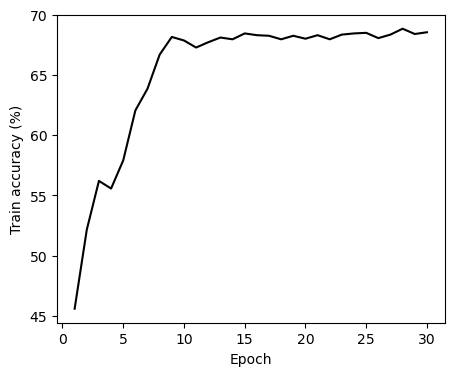

In [15]:
dt = 1e-3 # タイムステップ(sec)
t_inj = 0.350 # 刺激入力時間(sec)
t_blank = 0.150 # ブランク時間(sec)
nt_inj = round(t_inj/dt)
nt_blank = round(t_blank/dt)
    
n_neurons = 100 #興奮性/抑制性ニューロンの数
n_labels = 10 #ラベル数
n_epoch = 30 #エポック数
    
n_train = 10000 # 訓練データの数
update_nt = nt_inj # STDP則による重みの更新間隔
    
train, _ = chainer.datasets.get_mnist() # ChainerによるMNISTデータの読み込み
labels = np.array([train[i][1] for i in range(n_train)]) # ラベルの配列
    
    # ネットワークの定義
network =STDP_module.Network(n_in=784, n_neurons=n_neurons,
                                      wexc=2.25, winh=0.85,
                                      dt=dt, wmin=0.0, wmax=5e-2,
                                      lr=(1e-2, 1e-4),
                                      update_nt=update_nt)
    
network.initialize_states() # ネットワークの初期化
spikes = np.zeros((n_train, n_neurons)).astype(np.uint8) #スパイクを記録する変数
accuracy_all = np.zeros(n_epoch) # 訓練精度を記録する変数
blank_input = np.zeros(784) # ブランク入力
init_max_fr = 32 # 初期のポアソンスパイクの最大発火率
    
results_save_dir = "./LIF_WTA_STDP_MNIST_results/" # 結果を保存するディレクトリ
os.makedirs(results_save_dir, exist_ok=True) # ディレクトリが無ければ作成
    

for epoch in range(n_epoch):
    for i in tqdm(range(n_train)):
        max_fr = init_max_fr
        while(True):
            # 入力スパイクをオンラインで生成
            input_spikes = STDP_module.online_load_and_encoding_dataset(train, i, dt,
                                                            nt_inj, max_fr)
            spike_list = [] # サンプルごとにスパイクを記録するリスト
            # 画像刺激の入力
            for t in range(nt_inj):
                s_exc = network(input_spikes[t], stdp=True)
                spike_list.append(s_exc)
            
            spikes[i] = np.sum(np.array(spike_list), axis=0) # スパイク数を記録
            
            # ブランク刺激の入力
            for _ in range(nt_blank):
                _ = network(blank_input, stdp=False)

            num_spikes_exc = np.sum(np.array(spike_list)) # スパイク数を計算
            if num_spikes_exc >= 5: # スパイク数が5より大きければ次のサンプルへ
                break
            else: # スパイク数が5より小さければ入力発火率を上げて再度刺激
                max_fr += 16
    
    # ニューロンを各ラベルに割り当てる
    if epoch == 0:
        assignments, proportions, rates = STDP_module.assign_labels(spikes, labels,
                                                        n_labels)
    else:
        assignments, proportions, rates = STDP_module.assign_labels(spikes, labels,
                                                        n_labels, rates)
    print("Assignments:\n", assignments)
    
    # スパイク数の確認(正常に発火しているか確認)
    sum_nspikes = np.sum(spikes, axis=1)
    mean_nspikes = np.mean(sum_nspikes).astype(np.float16)
    print("Ave. spikes:", mean_nspikes)
    print("Min. spikes:", sum_nspikes.min())
    print("Max. spikes:", sum_nspikes.max())

    # 入力サンプルのラベルを予測する
    predicted_labels = STDP_module.prediction(spikes, assignments, n_labels)
    
    # 訓練精度を計算
    accuracy = np.mean(np.where(labels==predicted_labels, 1, 0)).astype(np.float16)
    print("epoch :", epoch, " accuracy :", accuracy)
    accuracy_all[epoch] = accuracy
    
    # 学習率の減衰
    network.lr_p *= 0.75
    network.lr_m *= 0.75
    
    # 重みの保存(エポック毎)
    np.save(results_save_dir+"weight_epoch"+str(epoch)+".npy",
            network.input_conn.W)
    

plt.figure(figsize=(5,4))
plt.plot(np.arange(1, n_epoch+1), accuracy_all*100,
             color="k")
plt.xlabel("Epoch")
plt.ylabel("Train accuracy (%)")
plt.savefig(results_save_dir+"accuracy.svg")
    #plt.show()
    
    # パラメータの保存
np.save(results_save_dir+"assignments.npy", assignments)
np.save(results_save_dir+"weight.npy", network.input_conn.W)
np.save(results_save_dir+"exc_neurons_theta.npy",
            network.exc_neurons.theta)

In [10]:
dt = 1e-3 # タイムステップ(sec)
t_inj = 0.350 # 刺激入力時間(sec)
t_blank = 0.150 # ブランク時間(sec)
nt_inj = round(t_inj/dt)
nt_blank = round(t_blank/dt)

n_neurons = 100 #興奮性/抑制性ニューロンの数
n_labels = 10 #ラベル数

n_train = 1000 # 訓練データの数
update_nt = nt_inj # STDP則による重みの更新間隔

_, test = chainer.datasets.get_mnist() # ChainerによるMNISTデータの読み込み
labels = np.array([test[i][1] for i in range(n_train)]) # ラベルの配列

# ネットワークの定義
results_save_dir = "./LIF_WTA_STDP_MNIST_results/" # 結果が保存されているディレクトリ

network = STDP_module.Network(n_in=784, n_neurons=n_neurons,
                                  wexc=2.25, winh=0.85, dt=dt)
network.initialize_states() # ネットワークの初期化
network.input_conn.W = np.load(results_save_dir+"weight.npy")
network.exc_neurons.theta = np.load(results_save_dir+"exc_neurons_theta.npy")
network.exc_neurons.theta_plus = 0

spikes = np.zeros((n_train, n_neurons)).astype(np.uint8) #スパイクを記録する変数
blank_input = np.zeros(784) # ブランク入力
init_max_fr = 32 # 初期のポアソンスパイクの最大発火率


for i in tqdm(range(n_train)):
    max_fr = init_max_fr
    while(True):
        # 入力スパイクをオンラインで生成
        input_spikes = STDP_module.online_load_and_encoding_dataset(test, i, dt,
                                                        nt_inj, max_fr)
        spike_list = [] # サンプルごとにスパイクを記録するリスト
        # 画像刺激の入力
        for t in range(nt_inj):
            s_exc = network(input_spikes[t], stdp=False)
            spike_list.append(s_exc)
        
        spikes[i] = np.sum(np.array(spike_list), axis=0) # スパイク数を記録
        
        # ブランク刺激の入力
        for _ in range(nt_blank):
            _ = network(blank_input, stdp=False)

        num_spikes_exc = np.sum(np.array(spike_list)) # スパイク数を計算
        if num_spikes_exc >= 5: # スパイク数が5より大きければ次のサンプルへ
            break
        else: # スパイク数が5より小さければ入力発火率を上げて再度刺激
            max_fr += 16


# 入力サンプルのラベルを予測する
assignments = np.load(results_save_dir+"assignments.npy")
predicted_labels = STDP_module.prediction(spikes, assignments, n_labels)

# 訓練精度を計算
accuracy = np.mean(np.where(labels==predicted_labels, 1, 0)).astype(np.float16)
print("Test accuracy :", accuracy)

100%|██████████| 1000/1000 [02:40<00:00,  6.25it/s]

Test accuracy : 0.643


100%|██████████| 100/100 [00:00<00:00, 155.23it/s]


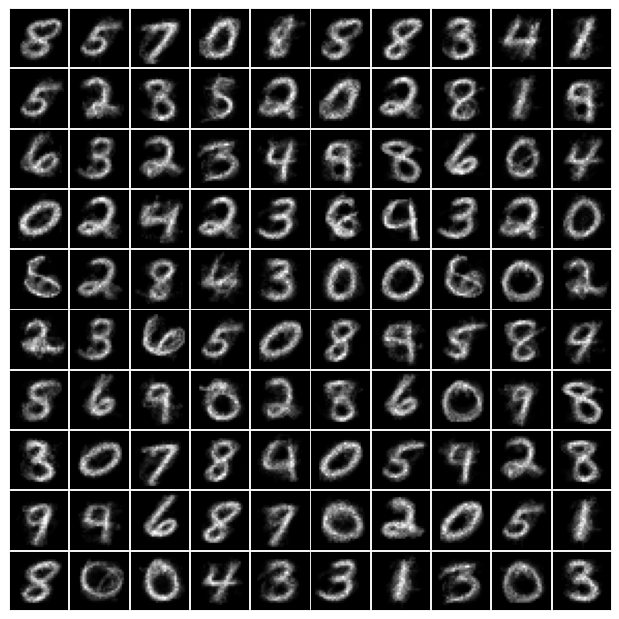

In [8]:
epoch = 1
n_neurons = 100

results_save_dir = "./LIF_WTA_STDP_MNIST_results/" # 結果が保存されているディレクトリ

input_conn_W = np.load(results_save_dir+"weight_epoch"+str(epoch)+".npy")
reshaped_W = np.reshape(input_conn_W, (n_neurons, 28, 28))

# 描画
fig = plt.figure(figsize=(6,6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1,
                    hspace=0.05, wspace=0.05)
row = col = int(np.sqrt(n_neurons))
for i in tqdm(range(n_neurons)):
  ax = fig.add_subplot(row, col, i+1, xticks=[], yticks=[])
  ax.imshow(reshaped_W[i], cmap="gray")
plt.savefig("weights_"+str(epoch)+".png")
plt.show()

100%|██████████| 100/100 [00:00<00:00, 103.34it/s]


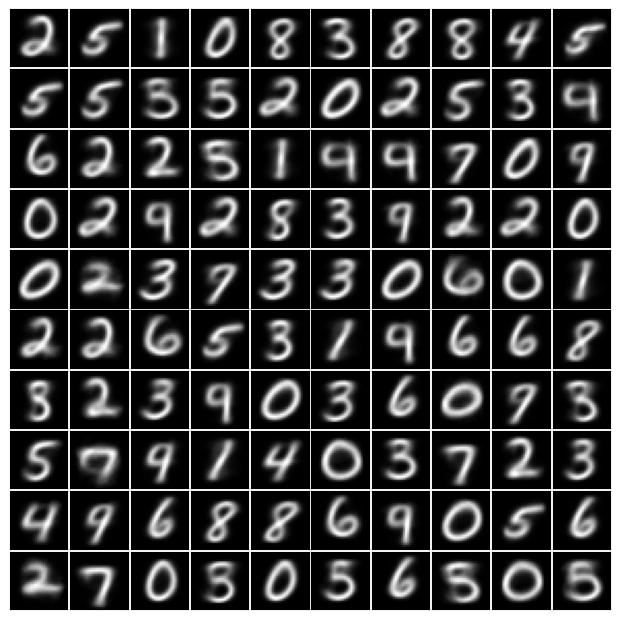

In [9]:
epoch = 29
n_neurons = 100

results_save_dir = "./LIF_WTA_STDP_MNIST_results/" # 結果が保存されているディレクトリ

input_conn_W = np.load(results_save_dir+"weight_epoch"+str(epoch)+".npy")
reshaped_W = np.reshape(input_conn_W, (n_neurons, 28, 28))

# 描画
fig = plt.figure(figsize=(6,6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1,
                    hspace=0.05, wspace=0.05)
row = col = int(np.sqrt(n_neurons))
for i in tqdm(range(n_neurons)):
  ax = fig.add_subplot(row, col, i+1, xticks=[], yticks=[])
  ax.imshow(reshaped_W[i], cmap="gray")
plt.savefig("weights_"+str(epoch)+".png")
plt.show()